In [82]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

actual_baseline = 2
true_baseline = 1
#NB: make sure to pass the right sampling frequency, check downsample flag and if TRUE use downsampleFreq


sampling_freq = 50 
moving_average_window = 10


In [52]:
pupil_data = pd.read_csv("../experiments/nancy_sus/deblinking/p1.csv", usecols=['TRIAL_INDEX','PUPIL_SIZE','STIMULI','SYSTEMS','BLOCKS','SUBJECT'])

In [53]:
pupil_data.head()


,TRIAL_INDEX,PUPIL_SIZE,STIMULI,SYSTEMS,BLOCKS,SUBJECT
0,6,266.0,sus_2011_0016_I.wav,I,1,p1
1,6,273.0,sus_2011_0016_I.wav,I,1,p1
2,6,271.0,sus_2011_0016_I.wav,I,1,p1
3,6,269.0,sus_2011_0016_I.wav,I,1,p1
4,6,266.0,sus_2011_0016_I.wav,I,1,p1


In [54]:
trials = pupil_data.TRIAL_INDEX.unique()
#for trial_index in trials:
#    single_data_trial = all_pupil_data[all_pupil_data['TRIAL_INDEX'] == trial_index].copy()
#    baseline_correction(single_data_trial.PUPIL_SIZE)
#    smoothing(single_data_trial.PUPIL_SIZE)

In [125]:
single_data_trial = pupil_data[pupil_data['TRIAL_INDEX'] == 8].copy()
single_data_trial['SAMPLE_INDEX'] = list(range(1,len(single_data_trial)+1))

if actual_baseline != true_baseline:
    remove_samples = int(sampling_freq*(actual_baseline-true_baseline))
    single_data_trial.drop(single_data_trial.index[:remove_samples], inplace=True)

baseline_samples_n = sampling_freq*true_baseline + 1

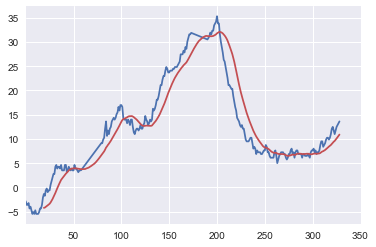

In [127]:
baseline = single_data_trial.PUPIL_SIZE[:baseline_samples_n]
mean_baseline = np.mean(baseline)
corrected_pupil_size = ((single_data_trial.PUPIL_SIZE - mean_baseline)/mean_baseline)*100
smoothing = corrected_pupil_size.rolling(window=20).mean()
values = [i for i in range(sampling_freq,len(corrected_pupil_size)+sampling_freq) if i % sampling_freq == 0]
corrected_pupil_size.plot(color='C0', xticks=values, use_index=False)
smoothing.plot(color='C2', xticks=values,use_index=False )
figure_name = "trial_6_corrected_smoothed"
plt.savefig(figure_name)

single_data_trial['CORRECTED'] = corrected_pupil_size
single_data_trial['SMOOTHED'] = smoothing

In [94]:
single_data_trial.tail()

,TRIAL_INDEX,PUPIL_SIZE,STIMULI,SYSTEMS,BLOCKS,SUBJECT,SAMPLE_INDEX,corrected,smoothed,CORRECTED,SMOOTHED
374,6,278.0,sus_2011_0016_I.wav,I,1,p1,375,3.422682,1.934586,3.422682,1.934586
375,6,278.0,sus_2011_0016_I.wav,I,1,p1,376,3.422682,2.269407,3.422682,2.269407
376,6,279.0,sus_2011_0016_I.wav,I,1,p1,377,3.794706,2.604229,3.794706,2.604229
377,6,280.0,sus_2011_0016_I.wav,I,1,p1,378,4.166730,2.864646,4.166730,2.864646
378,6,279.0,sus_2011_0016_I.wav,I,1,p1,379,3.794706,3.050658,3.794706,3.050658


In [124]:
smoothing.plot?

In [122]:
values = [i for i in range(sampling_freq,len(corrected_pupil_size)+sampling_freq) if i % sampling_freq == 0]
values


[50, 100, 150, 200, 250, 300, 350]

In [121]:
len(corrected_pupil_size)+sampling_freq

379